<a href="https://colab.research.google.com/github/zzwony/Start_0920/blob/main/12_21_%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.simplefilter('ignore')

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk

# Do not remove this line!
plt, Axes3D, sns, np, sp, pd, sm, sk

(<module 'matplotlib.pylab' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pylab.py'>,
 mpl_toolkits.mplot3d.axes3d.Axes3D,
 <module 'seaborn' from '/usr/local/lib/python3.8/dist-packages/seaborn/__init__.py'>,
 <module 'numpy' from '/usr/local/lib/python3.8/dist-packages/numpy/__init__.py'>,
 <module 'scipy' from '/usr/local/lib/python3.8/dist-packages/scipy/__init__.py'>,
 <module 'pandas' from '/usr/local/lib/python3.8/dist-packages/pandas/__init__.py'>,
 <module 'statsmodels.api' from '/usr/local/lib/python3.8/dist-packages/statsmodels/api.py'>,
 <module 'sklearn' from '/usr/local/lib/python3.8/dist-packages/sklearn/__init__.py'>)

## 데이터와 행렬
- 스칼라 : 숫자 하나만으로 이루어진 데이터
- 벡터 : 여러 숫자가 특정한 순서대로 모여 있는 것을 의미. 하나의 벡터를 이루는 데이터 수가 n개이면 n-차원 벡터라고 함
- 열벡터는 열의 수가 1인 행렬
- 하나의 데이터 레코드를 단독으로 벡터로 나타낼 때는 하나의 열로 나타내고 복수의 데이터 레코드 집합을 행렬로 나타낼 때는 하나의 데이터 레코드가 하나의 행으로 표기하는 것은 데이터 분석에서 일반적인 관례
- 스칼라와 벡터도 수학적으로는 행렬에 속한다.
- 스칼라는 열과 행의 수가 각각 1인 행렬이고 벡터는 열의 수가 1인 행렬이다.


In [ ]:
# 특징벡터: 데이터 벡터가 예측 문제에서 입력 데이터로 사용되면 특징벡터라고 함
from sklearn.datasets import load_iris

iris = load_iris()
x1 = iris.data[0, :]  # 첫 번재 꽃의 데이터
x1 # 특징 벡터

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# 넘파이를 사용한 벡터 표현: 벡터를 열 개수가 하나인 2차원 배열 객체로 표현. 배열의 차원은 벡터의 차원과 다른 의미임
x1 = np.array([[5.1],[3.5],[1.4],[0.2]])
x1

array([[5.1],
       [3.5],
       [1.4],
       [0.2]])

In [ ]:
# 넘파이는 1차원 배열 객체도 대부분 벡터로 인정
x1 = np.array([5.1, 3.5, 1.4, 0.2])
x1

array([5.1, 3.5, 1.4, 0.2])

- 벡터 데이터를 처리하는 프로그램에 따라서 두가지 표현법 중 열 표기를 정확하게 요구하는 경우도 있으므로 주의
- 사이킷런 패키지에서 벡터를 요구하는 경우에는 반드시 열 개수가 1개인 2차우너 배열 객체를 넣어야 함

In [64]:
# 한글 깨짐 해결방법 : 실행 후 Restart runtime 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,576 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

(8, 8)
<class 'numpy.ndarray'>
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<function matplotlib.pyplot.show(*args, **kw)>

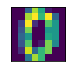

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
print(digits.images[0].shape)
print(type(digits.images[0]))
print(digits.images[0])
plt.figure(figsize=(1,1))
plt.imshow(digits.images[0])
plt.grid(False);plt.xticks([]);plt.yticks([])
plt.show

위에 import 부분은 실행시키지x

- 전치 연산

In [ ]:
import numpy as np

A = np.array([[11,12,13], [21,22,23]])
A

array([[11, 12, 13],
       [21, 22, 23]])

In [ ]:
# 전치 - 열과 행을 서로 바꿔버림
A.T

array([[11, 21],
       [12, 22],
       [13, 23]])

In [ ]:
x1 = np.array([5.1, 3.5, 1.4, 0.2])
x1

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
x1.T

array([5.1, 3.5, 1.4, 0.2])

행으로 한걸 열로 표현한 것이다.

## Python Numpy 선형대수(중요)

- 단위행렬 (Unit matrix): np.eye(n)
- 대각행렬 (Diagonal matrix): np.diag(x)
- 내적 (Dot product, Inner product): np.dot(a, b)
- 대각합 (Trace): np.trace(x)
- 행렬식 (Matrix Determinant): np.linalg.det(x)
- 역행렬 (Inverse of a matrix): np.linalg.inv(x)
- 고유값 (Eigenvalue), 고유벡터 (Eigenvector): w, v = np.linalg.eig(x)
- 특이값 분해 (Singular Value Decomposition): u, s, vh = np.linalg.svd(A)
- 연립방정식 해 풀기 (Solve a linear matrix equation): np.linalg.solve(a, b)
- 최소자승 해 풀기 (Compute the Least-squares solution): m, c = np.linalg.lstsq(A, y, rcond=None)[0]

https://rfriend.tistory.com/380


벡터 a를 벡터 b와 같은 방향의 성분과 그렇지 않은 성분으로 분해한다고 할 때 $|a|cosθ$의 길이는 벡터 b와 같은 방향의 성분 길이와 같다.  

벡터 a와 b의 내적은 벡터 b의 길이와 벡터 a에서 벡터 b와 같은 방향의 성분 길이를 곱한 것이다.

- 행렬 내적은 행렬 곱이며 두 행렬 A와 B의 내적은 np.dot()을 이용해 계산이 가능
- 행렬 내적의 특성으로 왼쪽 행렬의 열개수와 오른쪽 행렬의 행개수가 동일해야 내적 연산 가능


## Python Numpy 선형대수

- 단위행렬 (Unit matrix)
  - np.eye(n)
  - 단위행렬은 대각원소가 1이고, 나머지는 모두 0인 n차 정방행렬
- 대각행렬 (Diagonal matrix)
  - np.diag(x) 
  - 대각행렬은 대각성분 이외의 모든 성분이 모두 '0'인 n차 정방행렬
- 내적 (Dot product, Inner product)
  - np.dot(a, b)
  - Python에서 '*' 를 사용한 두 행렬 간 곱은 원소 간 곱(element-wise product)을 반환
- 대각합 (Trace)
  - np.trace(x) 
  - 정방행렬의 대각에 위치한 원소를 전부 더해줍니다
- 행렬식 (Matrix Determinant)
  - np.linalg.det(x) 
  - 역행렬이 존재하는지 여부를 확인하는 방법. 행렬식이 '0'이 아니면 역행렬이 존재
- 역행렬 (Inverse of a matrix)
  - np.linalg.inv(x) 
  - 역행렬은 n차정방행렬 Amn과의 곱이 항등행렬 또는 단위행렬 In이 되는 n차정방행렬
- 고유값 (Eigenvalue), 고유벡터 (Eigenvector)
  - w, v = np.linalg.eig(x) 
  - 정방행렬 A에 대하여 Ax = λx  (상수 λ) 가 성립하는 0이 아닌 벡터 x가 존재할 때 상수 λ 를 행렬 A의 고유값 (eigenvalue), x 를 이에 대응하는 고유벡터 (eigenvector)
- 특이값 분해 (Singular Value Decomposition)
  - u, s, vh = np.linalg.svd(A) 
  - 특이값 분해는 고유값 분해(eigen decomposition)처럼 행렬을 대각화하는 한 방법. 차원축소, 데이터 압축 등에 사용
- 연립방정식 해 풀기 (Solve a linear matrix equation)
  - np.linalg.solve(a, b)
  - <img src='https://t1.daumcdn.net/cfile/tistory/99FE4B3B5B7403642C' width=130>
  - a = np.array([[4, 3], [3, 2]])
  - b = np.array([23, 16])
  - x = np.linalg.solve(a, b)
  - print(x) >> [2. 5.]
- 최소자승 해 풀기 (Compute the Least-squares solution)
  - m, c = np.linalg.lstsq(A, y, rcond=None)[0] 
  - 회귀모형 적합할 때 최소자승법(Least-squares method)으로 잔차 제곱합을 최소화하는 회귀계수를 추정


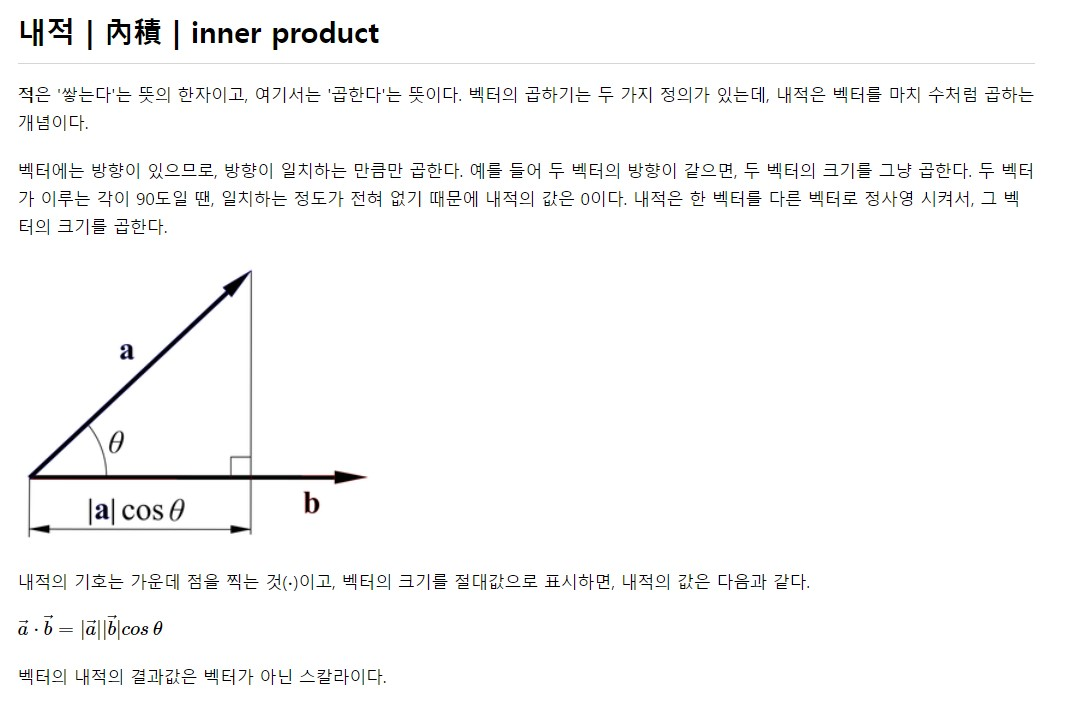

In [ ]:
from PIL import Image
from IPython.display import Image

image1 = Image(filename='/content/drive/MyDrive/내적.jpg')
display(image1)

In [3]:
# 영벡터
np.zeros((3,1))

array([[0.],
       [0.],
       [0.]])

In [4]:
# 일벡터
np.ones((3,1))

array([[1.],
       [1.],
       [1.]])

In [5]:
# 정방 행렬/정사각형 행렬(Square Matrix): 같은 수의 행과 열을 갖는 행렬(n x n 행렬)
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [6]:
# 대각 정방행렬(diagonal matrix): 주대각선(principal diagonal) 원소들을 제외한 원소들이 모두 0인 정방행렬
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [7]:
# 항등행렬: 단위 행렬(영어:unit matrix) 또는 항등 행렬(영어: indentity matrix)은 주대각선의 원소가 모두 1이며
# 나머지 원소는 모두 0인 정사각 행렬
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
# Q. 대각합이 5인 항등행렬을 생성하기
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [8]:
# 항등행렬
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

벡터와 행렬의 연산
- 벡터/행렬의 덧셈과 뺄셈 : 같은 위치에 있는 원소끼리 수행. 요소별 연산
- 스칼라와 벡터/행렬의 곱셈
- 브로드캐스팅 : 스칼라를 벡터로 변환한 연산을 허용
- 벡터와 벡터의 곱셈. 내적
 - 두 벡터의 차원(길이)이 같아야 한다.
 - 앞의 벡터가 행벡터이고 뒤의 벡터가 열벡터여야 한다.
 - 내적의 결과는 스칼라 값이 됨. dot() 또는 @ 연산자로 계산

In [11]:
x = np.array([10, 11, 12, 13, 14])
y = np.array([0, 1, 2, 3, 4])

In [12]:
np.array([[5,6],[7,8]]) + np.array([[10, 20], [30,40]]) - np.array([[1,2], [3,4]])

array([[14, 24],
       [34, 44]])

In [13]:
# 스칼라와 벡터/행렬 곱셈
x1 = np.array([10, 11, 12])
np.dot(3, x1)

array([30, 33, 36])

In [14]:
# 브로드캐스팅
x1 = np.array([10, 11, 12])
x1 - 10

array([0, 1, 2])

In [17]:
# 넘파이에서 벡터와 행렬의 내적은 dot() 또는 @ 연산자로 계산
x = np.array([[1], [2], [3]])
y = np.array([[4], [5], [6]])
print(x)
print(x.T, '\n')
print(y, '\n')
x.T @ y ## 또는 np.dot(x.T, y)

[[1]
 [2]
 [3]]
[[1 2 3]] 

[[4]
 [5]
 [6]] 



array([[32]])

In [18]:
# 넘파이에서는 1차원 배열끼리도 내적을 계산하는데 넘파이가 앞의 벡터는 행벡터이고 뒤의 열벡터라고 가정한다.
# 1차원 ndarray는 전치연산이 정의되지 않느다.
x = np.array([1,2,3])
y = np.array([4,5,6])

x @ y ## 또는 np.dot(x,y)

32

- 가중합: 복수의 데이터를 단순히 합하는 것이 아니라 각각의 수에 어떤 가중치를 곱한 후 이 곱셈 결과들을 다시 합한 것을 의미
- 벡터의 내적은 가중합을 계산할 때 사용될 수 있음
- 가중평균: 가중치의 가중치값을 전체 가중치값의 합으로 나누면 가중평균이 됨

In [20]:
# p 주식가격, n 주식수 일때 매수금액을 내적으로 구하기
p = np.array([100, 80, 50])
n = np.array([3, 4, 5])

print(p)
print(n)
np.dot(p.T, n)
# p.T @ n

[100  80  50]
[3 4 5]


870

매수금액 870이 필요하다

In [21]:
# 행렬곱: x.dot(y), np.dot(x,y)
x = np.arange(1,7).reshape(2,3)
y = np.array([[6., 23], [-1, 7], [8, 9]])
print(x)
print(y)
x.dot(y)

[[1 2 3]
 [4 5 6]]
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]


array([[ 28.,  64.],
       [ 67., 181.]])

In [22]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

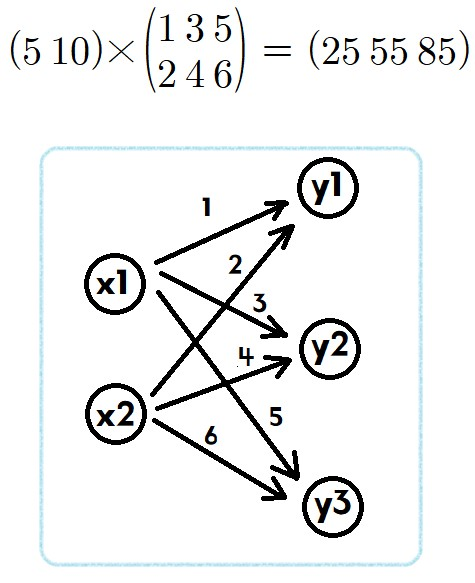

In [23]:
from PIL import Image
from IPython.display import Image

# 행렬 곱을 응용하여 신경망에 적용 (1,2) (2,3) 각각의 2가 같아야하고 출력은 (1,3)이 된다.

image = Image(filename='/content/drive/MyDrive/행렬곱.jpg')
display(image)

In [24]:
x = np.arange(10)
N = len(x)
print(x)
print(np.ones(N))
print(N)
print(x/N)
np.ones(N) @ x/N

[0 1 2 3 4 5 6 7 8 9]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
10
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


4.5

In [25]:
x.mean()

4.5

- 유사도는 두 벡터가 닮은 정도를 정량적으로 나타낸 값으로 두 벡터가 비슷한 경우세는 유사도가 커진다.
- 내적을 이요하면 코사인 유사도라는 유사도를 계산할 수 있다.

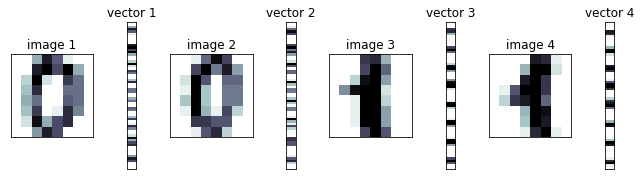

In [2]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec
import matplotlib.pylab as plt

digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(1, 8, height_ratios=[1],
                       width_ratios=[9, 1, 9, 1, 9, 1, 9, 1])
for i in range(4):
    plt.subplot(gs[2 * i])
    plt.imshow(eval("d" + str(i + 1)), aspect=1,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("image {}".format(i + 1))
    plt.subplot(gs[2 * i + 1])
    plt.imshow(eval("v" + str(i + 1)), aspect=0.25,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("vector {}".format(i + 1))
plt.tight_layout()
plt.show()

In [28]:
# 0 이미자와 0 이미지의 내적값
print(v1.T.shape)
print(v2.shape)
v1.T @ v2

(1, 64)
(64, 1)


array([[3064.]])

In [29]:
v1.T @ v3

array([[1866.]])

In [30]:
# 0 이미지와 1 이미지 또는 1이미지와 0 이미지의 내적값
# 상대적으로 다른 이미지의 내적값은 같은 이미지의 내적값 보다 작다.
(v1.T @ v3)[0][0], (v1.T @ v4)[0],[0], (v2.T @ v3)[0],[0], (v2.T @ v4)[0],[0]

(1866.0, array([1883.]), [0], array([2421.]), [0], array([2479.]), [0])

### 선형회귀 모형의 단점
- 비선형적인 현실세계의 데이터를 잘 예측하지 못할 수 있다는 단점이 있음
- 선형회귀 모형이 아닌 완전히 다른 모형을 쓰기 보다는 선형회귀 모형을 기반으로 여러 기법을 사용해 수정한 모형을 사용하는 것이 일반적임

In [32]:
# 행렬과 행렬의 곱셈: 앞 행렬의 열의 수가 뒤 행렬의 행의 수와 일치해야 한다.
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[1,2],[3,4], [5,6]])
C1 = A @ B
C2 = np.dot(A,B)

print(C1, '\n')
print(C2)

[[22 28]
 [49 64]] 

[[22 28]
 [49 64]]


In [33]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
C = np.array([[9,8], [7,6]])

In [34]:
# 교환 법칙이 성립하지 않음
A @ B

array([[19, 22],
       [43, 50]])

In [35]:
B @ A

array([[23, 34],
       [31, 46]])

In [36]:
# 분배법칙은 성립함
A @ (B+C)

array([[42, 42],
       [98, 98]])

In [37]:
A @ B + A @ C

array([[42, 42],
       [98, 98]])

In [38]:
(A + B) @ C

array([[110,  96],
       [174, 152]])

In [39]:
A @ C + B @ C

array([[110,  96],
       [174, 152]])

In [40]:
# 전치 연산도 덧셈, 뺄셈에 대한 분배 법칙이 성립함
(A + B).T

array([[ 6, 10],
       [ 8, 12]])

In [42]:
A.T + B.T

array([[ 6, 10],
       [ 8, 12]])

In [43]:
# 전치 연산과 곱셈의 경우에는 분배 법칙이 성립하지만 전치 연산이 분배되면서 곱셈의 순서가 바뀜
(A @ B).T

array([[19, 43],
       [22, 50]])

In [44]:
B.T @ A.T

array([[19, 43],
       [22, 50]])

In [45]:
# 항등행렬의 곱셈
A = np.array([[1,2], [3,4]])
I = np.eye(2)

In [46]:
I

array([[1., 0.],
       [0., 1.]])

In [47]:
A @ I

array([[1., 2.],
       [3., 4.]])

In [48]:
I @ A

array([[1., 2.],
       [3., 4.]])

###  벡터의 선형조합은 다양한 분야에 응용
- 두 이미지 벡터의 선형조합은 두 이미지를 섞어놓은 모핑 효과를 얻는 데 사용

[[0.3305785  0.30578512 0.3305785  ... 0.3966942  0.37190083 0.28512397]
 [0.32231405 0.32231405 0.29752067 ... 0.41322315 0.338843   0.2603306 ]
 [0.3264463  0.30991736 0.30578512 ... 0.40495867 0.36363637 0.27272728]
 ...
 [0.16115703 0.16528925 0.1570248  ... 0.14049587 0.1570248  0.16115703]
 [0.1570248  0.17768595 0.16115703 ... 0.14049587 0.1570248  0.1570248 ]
 [0.17768595 0.1694215  0.16528925 ... 0.1446281  0.15289256 0.15289256]] 



Text(0.5, 1.0, 'image 1: $x_1$')

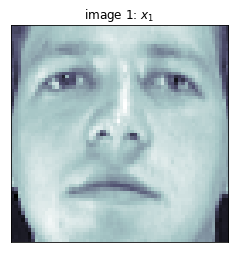

In [3]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
print(faces.images[6],'\n')
f, ax = plt.subplots(1, 1)

ax.imshow(faces.images[6], cmap=plt.cm.bone)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("image 1: $x_1$")

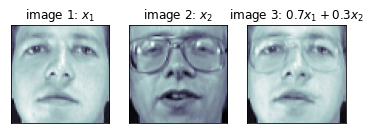

In [4]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

f, ax = plt.subplots(1, 3)

ax[0].imshow(faces.images[6], cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1: $x_1$")

ax[1].imshow(faces.images[10], cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2: $x_2$")

new_face = 0.7 * faces.images[6] + 0.3 * faces.images[10]
ax[2].imshow(new_face, cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3: $0.7x_1 + 0.3x_2$")

plt.show()

In [52]:
faces.images[6].shape

(64, 64)

In [54]:
x = np.array([1,2,3])
A = np.arange(1, 10).reshape(3,3)
print(x, '\n')
print(A, '\n')
print(x @ A, '\n')
print(x @ A @ x)

[1 2 3] 

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[30 36 42] 

228


In [55]:
x = np.array([30, 36, 42])
y = np.array([1,2,3])
print(x.T, '\n')
print(x.T @ y, '\n')
print(x @ y)

[30 36 42] 

228 

228


- 벡터의 놈은 다음 4가지 성질을 만족하면서 벡터에서 실수 값을 연결하는 함수로 정의하고, \||x||로 표기한다.

           1. ||x||은 음수가 아닌 실수값이다. 즉, ||x||>=0
           2. x = 0일때만 ||x|| = 0 이다.
           3. 스칼라 a에 대해서 ||ax|| = |a|||x|| 가 성립한다.
           4. ||x+y|| <= ||x|| + ||y|| 이 성립한다..

- 위 4가지 성질을 만족하기만 하면 놈이라고 할 수 있는데, 많이 사용되는 놈은 다음 세 가지이다. 놈을 구별하기 위하여 아래 첨자를 사용하고, $||x||_1을 1-놈, ||x||_2 를 2-놈, ||x||_\infty를 3-놈$이라고 한다.
- 1-놈은 벡터 x의 성분의 절대값을 모두 더한 것으로, 2-놈은 벡터의 기하학적 길이로, $\infty-놈$은 벡터 성분 중에서 크기가 제일 큰 값으로 정의한다.
- p = 2인 경우가 가장 많이 쓰이므로 p값 표기가 없는 경우 p=2인 프로베니우스 놈을 사용한다.

https://bskyvision.com/825  
https://pasus.tistory.com/34


In [5]:
import numpy as np

A = (np.arange(9)-4).reshape((3,3))
A

array([[-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4]])

In [6]:
np.linalg.norm(A) # 벡터의 놈 구하기

7.745966692414834

In [7]:
a = np.array([1,3,5,7])

# 1-norm
n1 = np.linalg.norm(a,1) # 16.0
print(n1, '\n')

# 2-norm(frobenius norm)
n2 = np.linalg.norm(a, 2) # 9.16515138991168
print(n2, '\n')

# infinity-norm  # 3-norm
np.linalg.norm(a, np.inf) #7.0

16.0 

9.16515138991168 



7.0

In [8]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
# 대각합 계산
np.trace(np.eye(3))

3.0

행렬식
- 행렬식의 기하학적 성질 : 부피

https://ratsgo.github.io/linear%20algebra/2017/05/21/determinants/ <br>
https://www.youtube.com/watch?v=fuVMiyahzH4


In [10]:
import numpy.linalg as LA

d = np.array([[1,0], [0,1]])
LA.det(d)

1.0

In [11]:
e = np.array([[1,0,0],
              [0,1,0]])
LA.det(e)

LinAlgError: ignored

출력결과 에러 발생

In [12]:
# 행렬식: 절댓값은 부피
# 행렬식이 0이라는 것은 도형의 부피가 0이며 행렬을 구성하는 벡터가 서로 동일선상에 있다는 것을 의미
A = np.array([[1,2,3], [4,5,6],[7,8,9]])
print(A)
np.linalg.det(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


0.0

In [14]:
import numpy.linalg as LA

a = np.arange(25).reshape(5,5)
print(a)
np.linalg.det(A)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


0.0

In [15]:
import numpy.linalg as load_digits
a = np.arange(25).reshape(5,5)
print(a)

print(LA.det(a))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
0.0


In [16]:
e = np.eye(5)
print(LA.det(e))

1.0


선형 연립방정식
- 선형예측모형은 입력 데이터 벡터와 가중치 벡터의 내적으로 계산된 예측값이 실제 출력 데이터와 유사한 값을 출력하도록 하는 모형
- 연립방정식과 역행렬을 이용하여 선형 예측 모형의 가중치 벡터를 구할 수 있다.
역행렬
- 정방행렬에 대한 역행렬은 원래의 행렬과 다음 관계를 만족하는 정방행렬을 의미 $A^{-1}A = AA^{-1} = I$, I는 항등행렬


In [17]:
# 역행렬: 어떤 행렬 A와 곱했을 때 곱셈에 대한 항등원인 단위행렬 E가 나오는 행렬을 행렬 A의 역행렬이라 함
# np.linalg.inv(x)

np.random.seed(0)
mt1 = np.random.randint(1,4,size=(3,3))
mt1

mt2 = np.linalg.inv(mt1)
mt2

array([[ 7., -1., -4.],
       [-1.,  0.,  1.],
       [-4.,  1.,  2.]])

In [18]:
np.dot(mt1, mt2)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
# Q. 아래 두 행렬을 np.arange, reshape를 이용해서 생성 긱긱 a1, b1으로 저장하고
# 행렬 내적을 계산한 결과를 출력하세요

[[1 2 3]
 [4,5,6]]

 [[10 11]
  [12 13]
  [14,15]]

In [21]:
# A.
a = np.arange(1,7).reshape(2,3)
b = np.arange(10,16).reshape(3,2)
ab_product = np.dot(a,b)
print(ab_product)

[[ 76  82]
 [184 199]]


In [20]:
import numpy as np

arr = np.matrix([[1,3], [5,7]])
print(arr, '\n')
arr_inv = np.linalg.inv(arr)
print(arr_inv, type(arr_inv))

[[1 3]
 [5 7]] 

[[-0.875  0.375]
 [ 0.625 -0.125]] <class 'numpy.matrix'>


In [23]:
np.dot(arr, arr_inv)

matrix([[1., 0.],
        [0., 1.]])

In [24]:
np.matmul(arr, arr_inv)

matrix([[1., 0.],
        [0., 1.]])

In [25]:
import numpy as np

arr = np.array([
    [[1,3],
     [5,7]],
     [[2,5],
      [4,6]]])
print(arr, '\n')
arr_inv = np.linalg.inv(arr)

print(arr_inv)

[[[1 3]
  [5 7]]

 [[2 5]
  [4 6]]] 

[[[-0.875  0.375]
  [ 0.625 -0.125]]

 [[-0.75   0.625]
  [ 0.5   -0.25 ]]]


In [27]:
print(arr.shape)
print(arr_inv.shape)

(2, 2, 2)
(2, 2, 2)


In [29]:
np.dot(arr, arr_inv)

array([[[[ 1.   ,  0.   ],
         [ 0.75 , -0.125]],

        [[ 0.   ,  1.   ],
         [-0.25 ,  1.375]]],


       [[[ 1.375,  0.125],
         [ 1.   ,  0.   ]],

        [[ 0.25 ,  0.75 ],
         [ 0.   ,  1.   ]]]])

In [30]:
np.matmul(arr, arr_inv)

array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]])

np.dot과 np.matmul의 차이

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=cjh226&logNo=221356884894


역행렬

In [31]:
# 계수행렬
import numpy as np

A = np.array([[1,1,0], [0,1,1], [1,1,1]])
A

array([[1, 1, 0],
       [0, 1, 1],
       [1, 1, 1]])

In [33]:
# 역행렬
Ainv = np.linalg.inv(A)
Ainv

array([[ 0., -1.,  1.],
       [ 1.,  1., -1.],
       [-1.,  0.,  1.]])

In [34]:
# A-1A = AA-1 = , I는 항등행렬
A @ Ainv

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [35]:
np.dot(Ainv, A)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [36]:
b = np.array([[2], [2], [3]])
b

array([[2],
       [2],
       [3]])